P1

In [4]:
import numpy as np

def matrix_hilbert(n):
    return np.array([[1 / (i + j + 1) for j in range(n)] for i in range(n)])

def vector_b(A):
    return np.sum(A, axis=1)

def solver(n):
    A = matrix_hilbert(n)
    b = vector_b(A)
    x = np.linalg.solve(A, b)
    return x

def error_(x):
    x_exact = np.ones_like(x)
    return np.max(np.abs(x - x_exact))

def n_():
    n = 1
    while True:
        x = solver(n)
        error = error_(x)
        if error > 1e-6:
            return n - 1  
        n += 1

max_n = n_()
print(f"El valor más grande de n para el cual el error es <= 1e-6 es: {max_n}")

El valor más grande de n para el cual el error es <= 1e-6 es: 8


P2

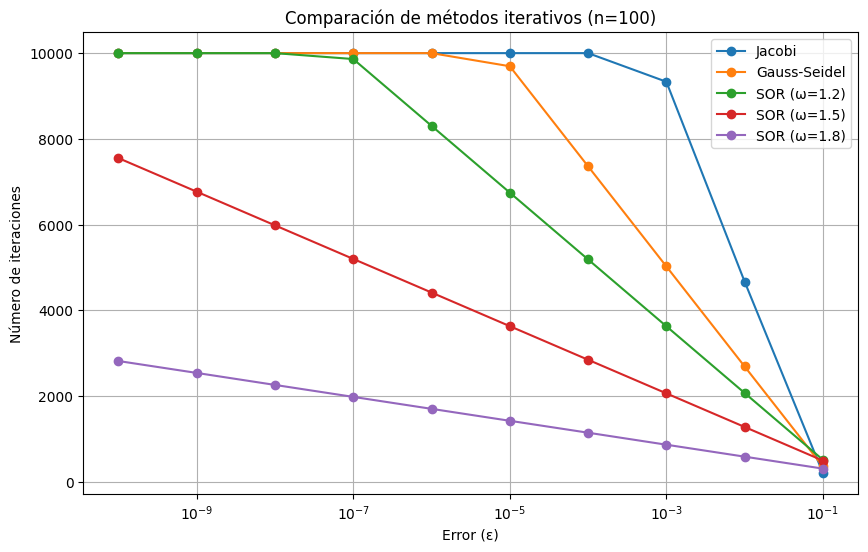

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def create_matrix_and_vector(n):
    """Crea la matriz A y el vector b del sistema dado."""
    A = np.zeros((n, n))
    np.fill_diagonal(A, 2)
    np.fill_diagonal(A[1:], -1)
    np.fill_diagonal(A[:, 1:], -1)
    A[0, -1] = 1
    A[-1, 0] = 1
    b = np.zeros(n)
    b[-1] = 1
    return A, b

def exact_solution(n):
    """Calcula la solución exacta del sistema."""
    return np.array([-n/4 + i/2 for i in range(1, n+1)])

def jacobi(A, b, x0, epsilon, max_iter):
    """Implementa el método de Jacobi."""
    n = len(b)
    x = x0.copy()
    for k in range(max_iter):
        x_new = np.zeros(n)
        for i in range(n):
            s = sum(A[i, j] * x[j] for j in range(n) if j != i)
            x_new[i] = (b[i] - s) / A[i, i]
        if np.linalg.norm(x_new - x) < epsilon:
            return x_new, k + 1
        x = x_new
    return x, max_iter

def gauss_seidel(A, b, x0, epsilon, max_iter):
    """Implementa el método de Gauss-Seidel."""
    n = len(b)
    x = x0.copy()
    for k in range(max_iter):
        x_new = x.copy()
        for i in range(n):
            s1 = sum(A[i, j] * x_new[j] for j in range(i))
            s2 = sum(A[i, j] * x[j] for j in range(i + 1, n))
            x_new[i] = (b[i] - s1 - s2) / A[i, i]
        if np.linalg.norm(x_new - x) < epsilon:
            return x_new, k + 1
        x = x_new
    return x, max_iter

def sor(A, b, x0, omega, epsilon, max_iter):
    """Implementa el método de sobrerelajación sucesiva (SOR)."""
    n = len(b)
    x = x0.copy()
    for k in range(max_iter):
        x_new = x.copy()
        for i in range(n):
            s1 = sum(A[i, j] * x_new[j] for j in range(i))
            s2 = sum(A[i, j] * x[j] for j in range(i + 1, n))
            x_new[i] = (1 - omega) * x[i] + (omega / A[i, i]) * (b[i] - s1 - s2)
        if np.linalg.norm(x_new - x) < epsilon:
            return x_new, k + 1
        x = x_new
    return x, max_iter

def compare_methods(n, epsilons, omega_values):
    A, b = create_matrix_and_vector(n)
    x_exact = exact_solution(n)
    x0 = np.zeros(n)
    max_iter = 10000

    results = {method: [] for method in ['Jacobi', 'Gauss-Seidel'] + [f'SOR (ω={omega:.1f})' for omega in omega_values]}

    for epsilon in epsilons:
        _, iterations_jacobi = jacobi(A, b, x0, epsilon, max_iter)
        _, iterations_gauss = gauss_seidel(A, b, x0, epsilon, max_iter)
        
        results['Jacobi'].append(iterations_jacobi)
        results['Gauss-Seidel'].append(iterations_gauss)
        
        for omega in omega_values:
            _, iterations_sor = sor(A, b, x0, omega, epsilon, max_iter)
            results[f'SOR (ω={omega:.1f})'].append(iterations_sor)

    plt.figure(figsize=(10, 6))
    for method, iterations in results.items():
        plt.semilogx(epsilons, iterations, marker='o', label=method)
    
    plt.xlabel('Error (ε)')
    plt.ylabel('Número de iteraciones')
    plt.title(f'Comparación de métodos iterativos (n={n})')
    plt.legend()
    plt.grid(True)
    plt.show()

# Ejecutar la comparación
n = 100
epsilons = np.logspace(-10, -1, 10)
omega_values = [1.2, 1.5, 1.8]
compare_methods(n, epsilons, omega_values)